# Aufgabe 01: Einführung mit OR, AND und XOR
Wir haben Dir hier eine Lösung für ein neuronales Netz gegeben, das die logische Funktion OR lernt. Erweitere das Netz so, dass es nun ein AND und wenn das geklappt hat, dann noch das XOR lernt. 

### Hinweise
* Sequential, `fit`, `compile`: https://keras.io/models/sequential/
* Input Layer: Leider gibt es dazu keine Doku :-) (siehe Folien weiter oben)
* Dense Layer: https://keras.io/layers/core/#dense
* Loss function: https://keras.io/losses/
* Optimizer: https://keras.io/optimizers/
* Damit jupyter notebook sich beim Lernen nicht aufhängt, setze den Parameter verbose=0 beim `model.fit`

### Importiere Bibliotheken

In [1]:
# Library, die eine einfache Handhabung 
# von Vektoren, Matrizen oder generell 
# großen mehrdimensionalen Arrays ermöglicht.
import numpy as np

# Keras spezifische Importe
from keras.models import Sequential, InputLayer
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import losses

# Library für die Ausgabe von Grafiken
import matplotlib.pyplot as plt

### <span style="color:red">TODO:</span> Definiere Eingabe und die erwartete Ausgabe

In [2]:
# Daten, die gelernt werden sollen
# X = input
# Y = output
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([ [0],  [1],  [1],  [1]])

### <span style="color:red">TODO:</span> Definiere das Modell

In [3]:
# Definition des Neuronalen Netzes
# Sequential ist einfach ein linearer Stapel von Schichten
model = Sequential()
# Definition des aussehens der Inputdaten. In unserem Fall 2 Neuronen
model.add(InputLayer(input_shape=(2,)))
# Eine Lage mit genau einem Neuron under sigmoiden Aktivierungsfunction
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Zusammenfassung. Wichtig ist vor allem die Anzahl trainierbaren Parameter
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Die initialen Gewichte sind zufällig
print(model.layers[0].get_weights())

[array([[ 1.2322849],
       [-1.13666  ]], dtype=float32), array([0.], dtype=float32)]


### <span style="color:red">TODO:</span> Konfiguriere den Lernalgorithmus

In [6]:
# Optimierung mittels Gradientenabstieg (Lernrate lr=0.3)
sgd = SGD(lr=0.3)
# Model wird jetzt kompiliert. Wir definieren den Wert, den das Netz optimieren soll. 
# In diesem Fall ist es der quadratische Abstand zwischen Ausgabedaten (Y) und gelernter Ausgabe 
model.compile(loss=losses.mean_squared_error, optimizer=sgd)


### <span style="color:red">TODO:</span> Lass dein Modell lernen

In [7]:
# Fitten wir das Modell. 1000 Iterationen, Keine Textausgabe.
history = model.fit(X, Y, epochs=1000, verbose=0)

### Testphase

In [8]:
# Die Ausgaben des Modells für alle 4 Eingaben
print(model.predict(X))

[[0.1621863 ]
 [0.90067863]
 [0.90291566]
 [0.9977099 ]]


In [9]:
# Die Gewichte haben sich geändert
print(model.layers[0].get_weights())

[array([[3.8720992],
       [3.846838 ]], dtype=float32), array([-1.6420499], dtype=float32)]


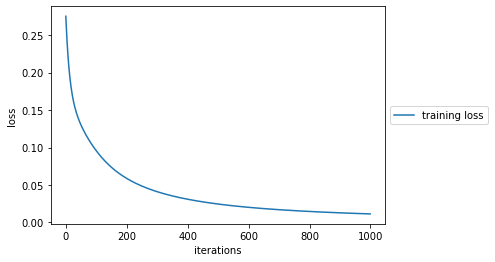

In [10]:
# Ausgabe der "Geschichte" des Lernprozesses
plt.plot(history.history['loss'], label='training loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()